In [1]:
# Analysis on e-commerce data

# Questions that will  be addressed during analysis are:-
           1.which customers have placed the highest number of orders?
           2.which countries have ordered the most(Top Countries with the Most Orders Placed)?
           3.which customers spent the most?
           4.which countries spent the most?

In [2]:
#importing important libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df= pd.read_csv("E-commerce.csv",engine='python',encoding= 'unicode_escape')


In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
df.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900,4070,4223,NaN,23260,NaN,NaN,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,10/31/2011 14:41,NaN,NaN,United Kingdom
freq,1114,2313,2369,NaN,1114,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,NaN,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,NaN,4.130000,16791.000000,NaN


In [6]:
#dealing with missing data
missing_data = df.isnull()
for columns in missing_data.columns.values.tolist():
    print(columns)
    print(missing_data[columns].value_counts())
    print("")

InvoiceNo
False    541909
Name: InvoiceNo, dtype: int64

StockCode
False    541909
Name: StockCode, dtype: int64

Description
False    540455
True       1454
Name: Description, dtype: int64

Quantity
False    541909
Name: Quantity, dtype: int64

InvoiceDate
False    541909
Name: InvoiceDate, dtype: int64

UnitPrice
False    541909
Name: UnitPrice, dtype: int64

CustomerID
False    406829
True     135080
Name: CustomerID, dtype: int64

Country
False    541909
Name: Country, dtype: int64



In [7]:
df.describe(include=["object"])

,InvoiceNo,StockCode,Description,InvoiceDate,Country
count,541909,541909,540455,541909,541909
unique,25900,4070,4223,23260,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,10/31/2011 14:41,United Kingdom
freq,1114,2313,2369,1114,495478


In [8]:
#Changing the Column Names

df.rename(index=str, columns={"InvoiceNo":"invoice_no","StockCode":"stock_code","Description":"description","Quantity":"quantity","InvoiceDate":"invoice_date","UnitPrice":"unit_price","CustomerID":"customer_id","Country":"country"},inplace=True)

In [9]:
df.columns

Index(['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date',
       'unit_price', 'customer_id', 'country'],
      dtype='object')

In [10]:
#No. of Rows with Null Values
df.isnull().sum().sort_values(ascending=False)

customer_id     135080
description       1454
invoice_no           0
stock_code           0
quantity             0
invoice_date         0
unit_price           0
country              0
dtype: int64

In [11]:
df[df.isnull().any(axis=1)].head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom


In [12]:
#Removing rows with missing data
df.dropna(inplace=True)
df.isnull().sum()

invoice_no      0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
customer_id     0
country         0
dtype: int64

In [13]:
#types of data in the dataset
df.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

In [14]:
#"invoice_date" to datetime dtype
df['invoice_date'] = pd.to_datetime(df["invoice_date"], format='%m/%d/%Y %H:%M')

In [15]:
#"description" to all lower caps
df["description"] = df["description"].str.lower()

In [16]:
df[["description","invoice_date"]].head()

,description,invoice_date
0,white hanging heart t-light holder,2010-12-01 08:26:00
1,white metal lantern,2010-12-01 08:26:00
2,cream cupid hearts coat hanger,2010-12-01 08:26:00
3,knitted union flag hot water bottle,2010-12-01 08:26:00
4,red woolly hottie white heart.,2010-12-01 08:26:00


In [17]:
#"customer_id" to int64 dtype
df["customer_id"] = df.customer_id.astype("int64")
df.customer_id.dtype

dtype('int64')

In [18]:
#Removing "quantity" with negative values
df = df[df["quantity"] > 0]
df["quantity"]

0          6
1          6
2          8
3          6
4          6
          ..
541904    12
541905     6
541906     4
541907     4
541908     3
Name: quantity, Length: 397924, dtype: int64

In [19]:
#Adding New Columns for Data-Parsing
df.insert(loc=2, column='year_month', value=df['invoice_date'].map(lambda x: 100*x.year + x.month))
df.insert(loc=3, column='month', value=df.invoice_date.dt.month)
# +1 to make Monday=1.....until Sunday=7
df.insert(loc=4, column='day', value=(df.invoice_date.dt.dayofweek)+1)
df.insert(loc=5, column='hour', value=df.invoice_date.dt.hour)

In [20]:
#Adding New Column for Revenue/Amount Spent
df["amount_spent"] = df["unit_price"]*df["quantity"]

In [21]:
df.columns

Index(['invoice_no', 'stock_code', 'year_month', 'month', 'day', 'hour',
       'description', 'quantity', 'invoice_date', 'unit_price', 'customer_id',
       'country', 'amount_spent'],
      dtype='object')

In [22]:
df_cleaned = df[['invoice_no','invoice_date','stock_code','description','quantity','unit_price','amount_spent','customer_id','country','month', 'day', 'hour']]
df_cleaned.head()

,invoice_no,invoice_date,stock_code,description,quantity,unit_price,amount_spent,customer_id,country,month,day,hour
0,536365,2010-12-01 08:26:00,85123A,white hanging heart t-light holder,6,2.55,15.30,17850,United Kingdom,12,3,8
1,536365,2010-12-01 08:26:00,71053,white metal lantern,6,3.39,20.34,17850,United Kingdom,12,3,8
2,536365,2010-12-01 08:26:00,84406B,cream cupid hearts coat hanger,8,2.75,22.00,17850,United Kingdom,12,3,8
3,536365,2010-12-01 08:26:00,84029G,knitted union flag hot water bottle,6,3.39,20.34,17850,United Kingdom,12,3,8
4,536365,2010-12-01 08:26:00,84029E,red woolly hottie white heart.,6,3.39,20.34,17850,United Kingdom,12,3,8


In [23]:
df_cleaned.to_excel("cleaned_data.xlsx",index=False)

In [24]:
df = df_cleaned
df.head()

,invoice_no,invoice_date,stock_code,description,quantity,unit_price,amount_spent,customer_id,country,month,day,hour
0,536365,2010-12-01 08:26:00,85123A,white hanging heart t-light holder,6,2.55,15.30,17850,United Kingdom,12,3,8
1,536365,2010-12-01 08:26:00,71053,white metal lantern,6,3.39,20.34,17850,United Kingdom,12,3,8
2,536365,2010-12-01 08:26:00,84406B,cream cupid hearts coat hanger,8,2.75,22.00,17850,United Kingdom,12,3,8
3,536365,2010-12-01 08:26:00,84029G,knitted union flag hot water bottle,6,3.39,20.34,17850,United Kingdom,12,3,8
4,536365,2010-12-01 08:26:00,84029E,red woolly hottie white heart.,6,3.39,20.34,17850,United Kingdom,12,3,8


# Customers with Most Orders Placed

In [25]:
cust_orders = df[["invoice_no","customer_id","country"]]
cust_orders.head(3)

,invoice_no,customer_id,country
0,536365,17850,United Kingdom
1,536365,17850,United Kingdom
2,536365,17850,United Kingdom


In [26]:
cust_orders = df.groupby(by=["customer_id","country"],as_index=False)["invoice_no"].count()

In [27]:
cust_orders = cust_orders.sort_values(["invoice_no"],ascending=False)
cust_orders = cust_orders.reset_index()
cust_orders.head()

,index,customer_id,country,invoice_no
0,4019,17841,United Kingdom,7847
1,1888,14911,EIRE,5677
2,1298,14096,United Kingdom,5111
3,334,12748,United Kingdom,4596
4,1670,14606,United Kingdom,2700


In [28]:
cust_orders.drop("index",axis=1,inplace=True)
cust_orders.head()

,customer_id,country,invoice_no
0,17841,United Kingdom,7847
1,14911,EIRE,5677
2,14096,United Kingdom,5111
3,12748,United Kingdom,4596
4,14606,United Kingdom,2700


In [29]:
cust_orders.rename(columns={"invoice_no":"no_of_orders"}, inplace=True)
cust_orders = cust_orders.head(20)

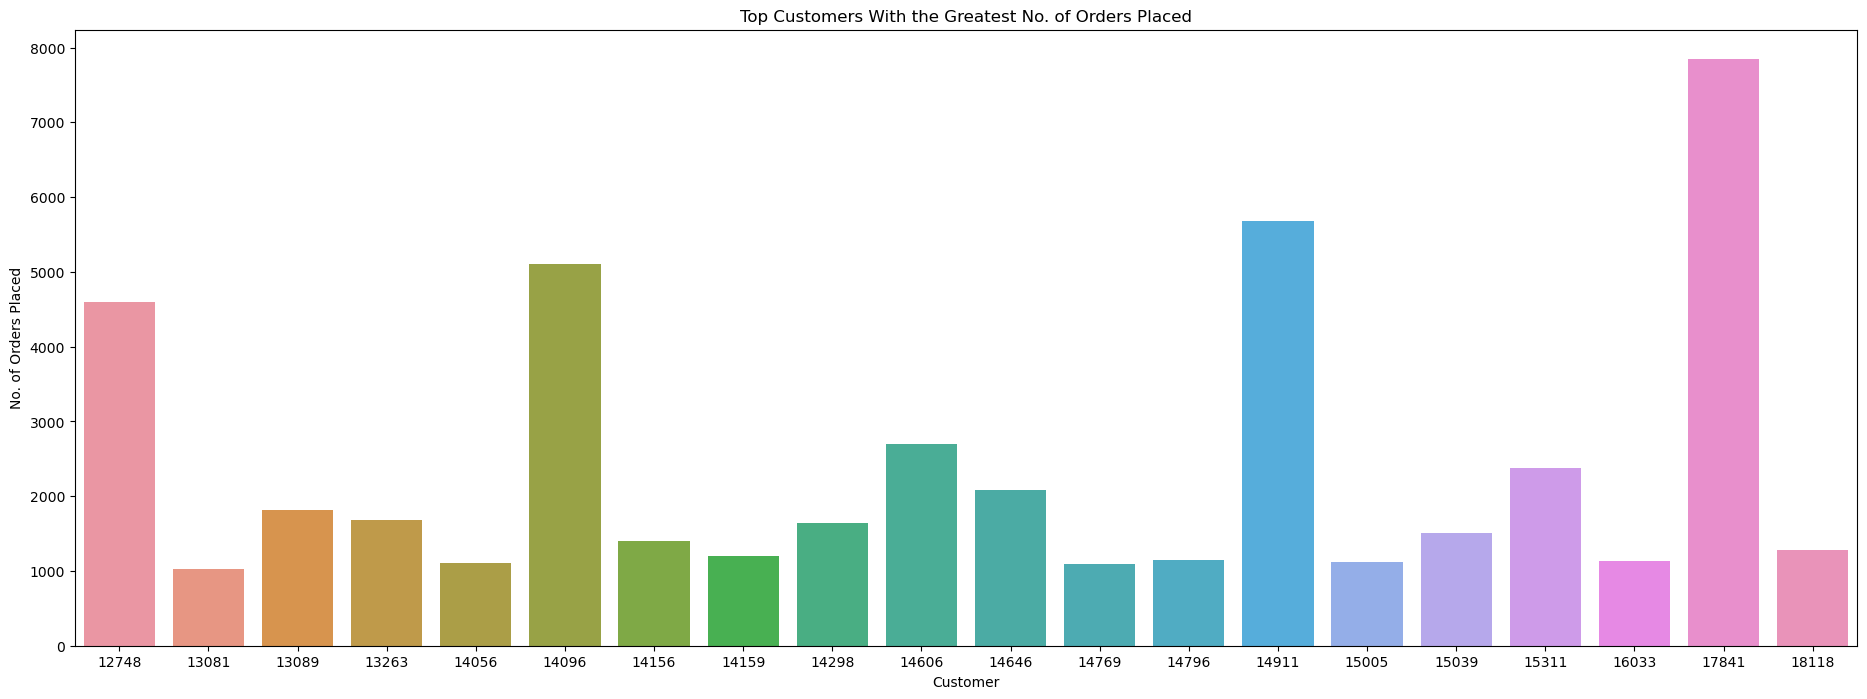

In [30]:
x = cust_orders["customer_id"]
y = cust_orders["no_of_orders"]
plt.figure(figsize=(23,8))
sns.barplot(x,y)
plt.xlabel("Customer")
plt.ylabel("No. of Orders Placed")
plt.title("Top Customers With the Greatest No. of Orders Placed")
plt.show()

# Top Countries with the Most Orders Placed

In [31]:
country_orders = df[["country","invoice_no"]]
country_orders.head(3)

,country,invoice_no
0,United Kingdom,536365
1,United Kingdom,536365
2,United Kingdom,536365


In [32]:
country_orders = country_orders.groupby(by=["country"],as_index=False)["invoice_no"].count()
country_orders.head(4)

,country,invoice_no
0,Australia,1185
1,Austria,398
2,Bahrain,17
3,Belgium,2031


In [33]:
country_orders = country_orders.sort_values(["invoice_no"],ascending=False)
country_orders.head()

,country,invoice_no
35,United Kingdom,354345
14,Germany,9042
13,France,8342
10,EIRE,7238
30,Spain,2485


In [34]:
country_orders = country_orders.reset_index(drop=True)

In [35]:
country_orders.rename(columns={"invoice_no":"no_of_orders"},inplace=True)
country_orders

,country,no_of_orders
0,United Kingdom,354345
1,Germany,9042
2,France,8342
3,EIRE,7238
4,Spain,2485
5,Netherlands,2363
6,Belgium,2031
7,Switzerland,1842
8,Portugal,1462
9,Australia,1185


In [36]:
country_orders = country_orders.head(10)
country_orders

,country,no_of_orders
0,United Kingdom,354345
1,Germany,9042
2,France,8342
3,EIRE,7238
4,Spain,2485
5,Netherlands,2363
6,Belgium,2031
7,Switzerland,1842
8,Portugal,1462
9,Australia,1185


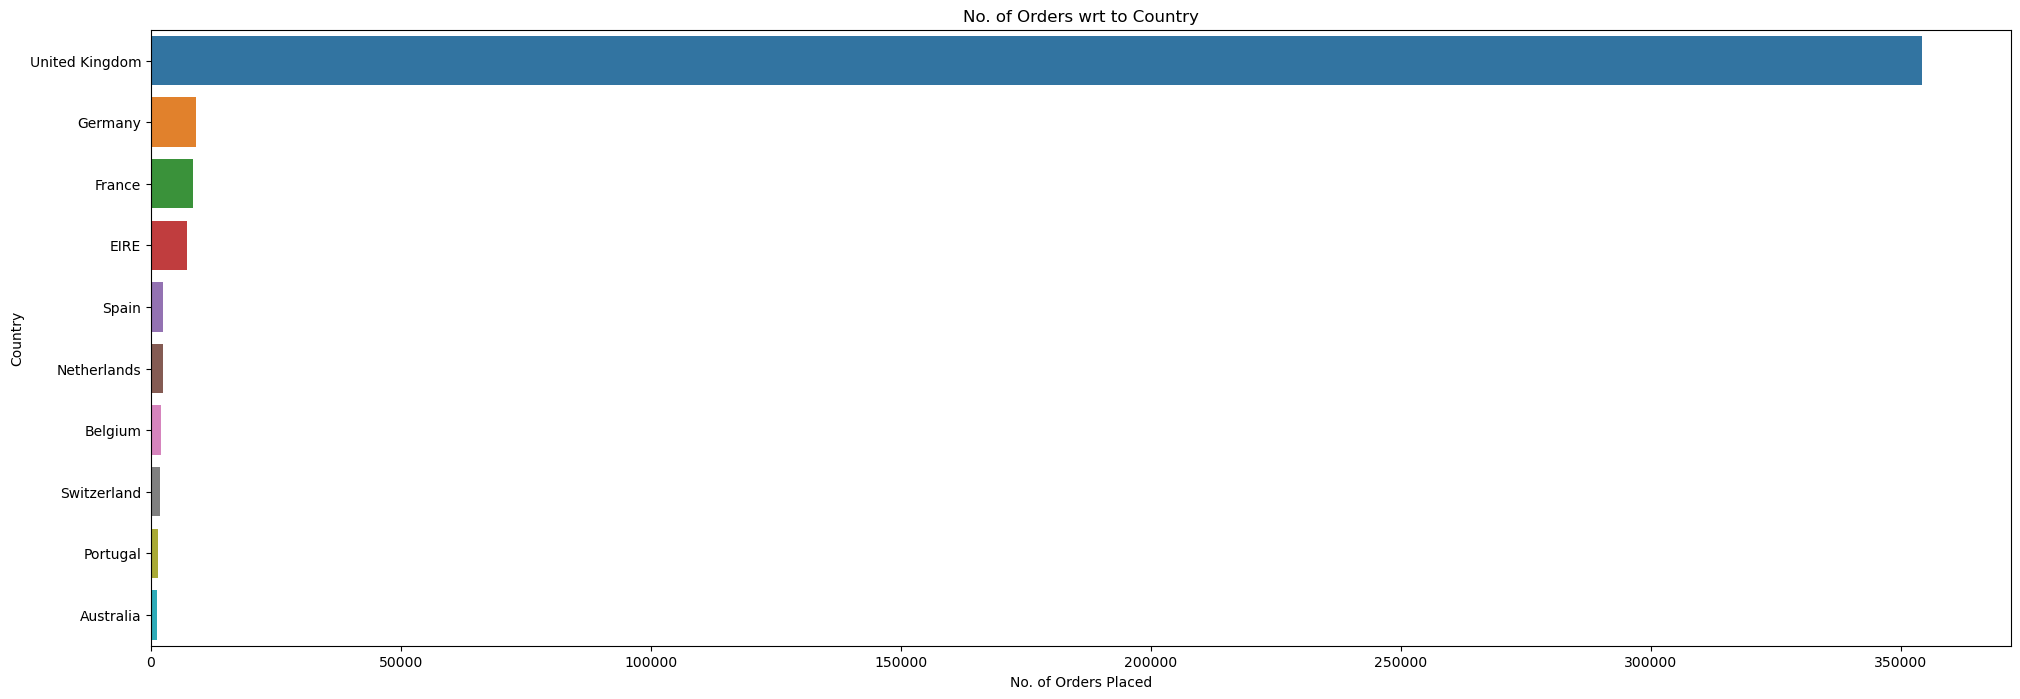

In [37]:
x = country_orders["no_of_orders"]
y = country_orders["country"]
plt.figure(figsize=(24,8))
sns.barplot(x,y)
plt.xlabel("No. of Orders Placed")
plt.ylabel("Country")
plt.title("No. of Orders wrt to Country")
plt.show()

# Top Customers with the Greatest Spending

In [38]:
customer_spend = df[["customer_id","amount_spent"]]
customer_spend = customer_spend.groupby(by=["customer_id"],as_index=False)["amount_spent"].sum()

In [39]:
customer_spend = customer_spend.sort_values(["amount_spent"],ascending=False)
customer_spend.head()

,customer_id,amount_spent
1690,14646,280206.02
4202,18102,259657.30
3729,17450,194550.79
3009,16446,168472.50
1880,14911,143825.06


In [40]:
customer_spend = customer_spend.reset_index(drop=True)

In [41]:
customer_spend = customer_spend.head(20)
customer_spend

,customer_id,amount_spent
0,14646,280206.02
1,18102,259657.30
2,17450,194550.79
3,16446,168472.50
4,14911,143825.06
5,12415,124914.53
6,14156,117379.63
7,17511,91062.38
8,16029,81024.84
9,12346,77183.60


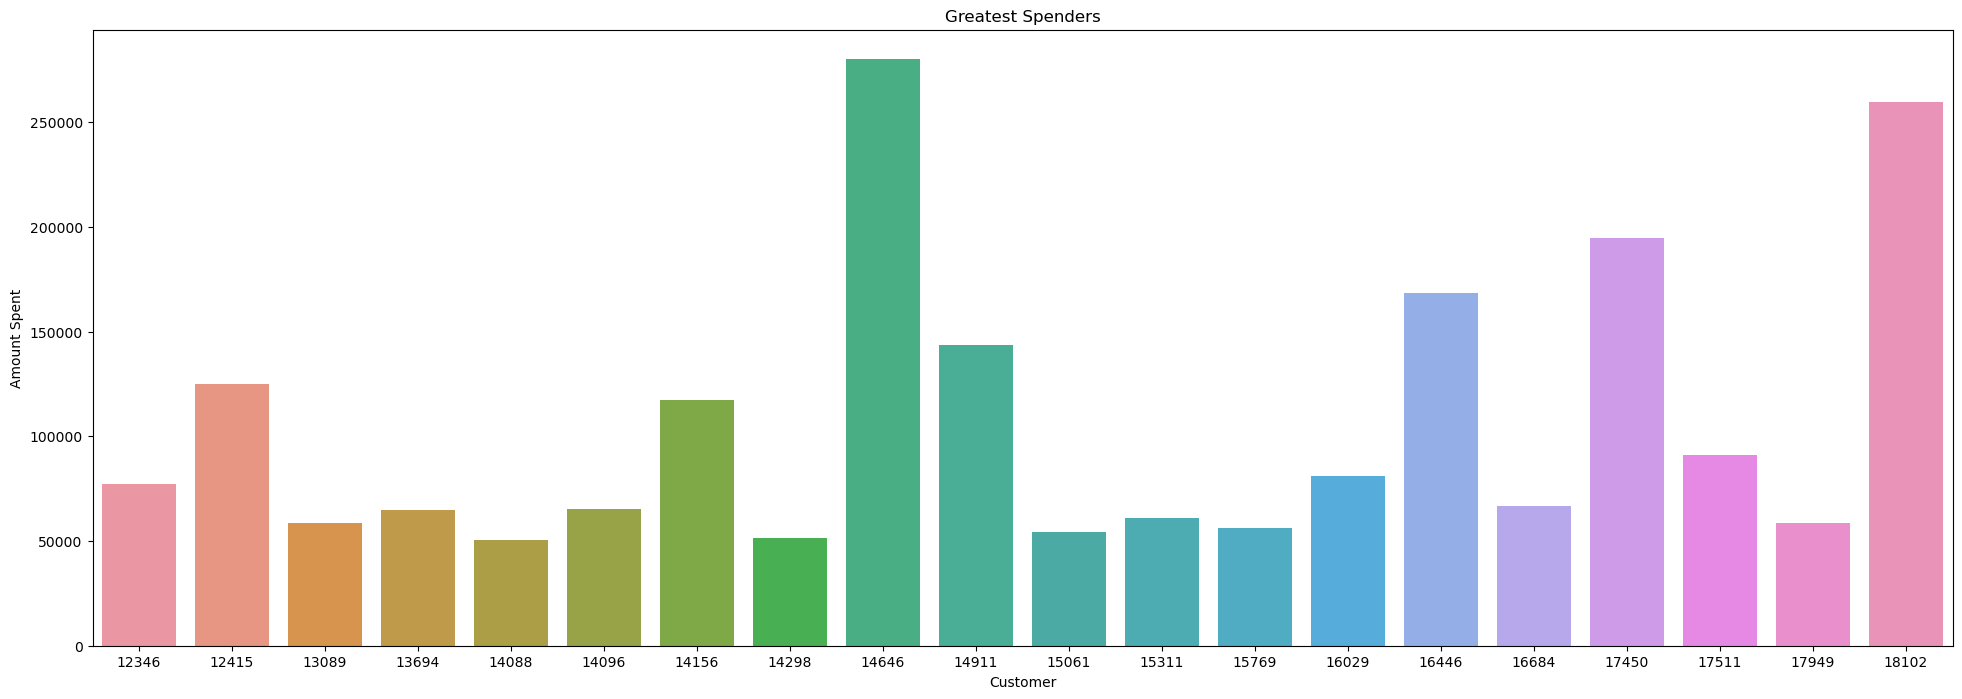

In [42]:
x = customer_spend["customer_id"]
y = customer_spend["amount_spent"]
plt.figure(figsize=(24,8))
sns.barplot(x,y)
plt.xlabel("Customer")
plt.ylabel("Amount Spent")
plt.title("Greatest Spenders")
plt.show()

# Top Countries with the Greatest Spending

In [43]:
country_spend = df[["country","amount_spent"]]
country_spend = country_spend.groupby(by=["country"],as_index=False)["amount_spent"].sum()
country_spend = country_spend.sort_values(["amount_spent"],ascending=False)
country_spend = country_spend.head(10)
country_spend

,country,amount_spent
35,United Kingdom,7308391.554
23,Netherlands,285446.340
10,EIRE,265545.900
14,Germany,228867.140
13,France,209024.050
0,Australia,138521.310
30,Spain,61577.110
32,Switzerland,56443.950
3,Belgium,41196.340
31,Sweden,38378.330


In [44]:
country_spend = country_spend.reset_index(drop=True)
country_spend

,country,amount_spent
0,United Kingdom,7308391.554
1,Netherlands,285446.340
2,EIRE,265545.900
3,Germany,228867.140
4,France,209024.050
5,Australia,138521.310
6,Spain,61577.110
7,Switzerland,56443.950
8,Belgium,41196.340
9,Sweden,38378.330


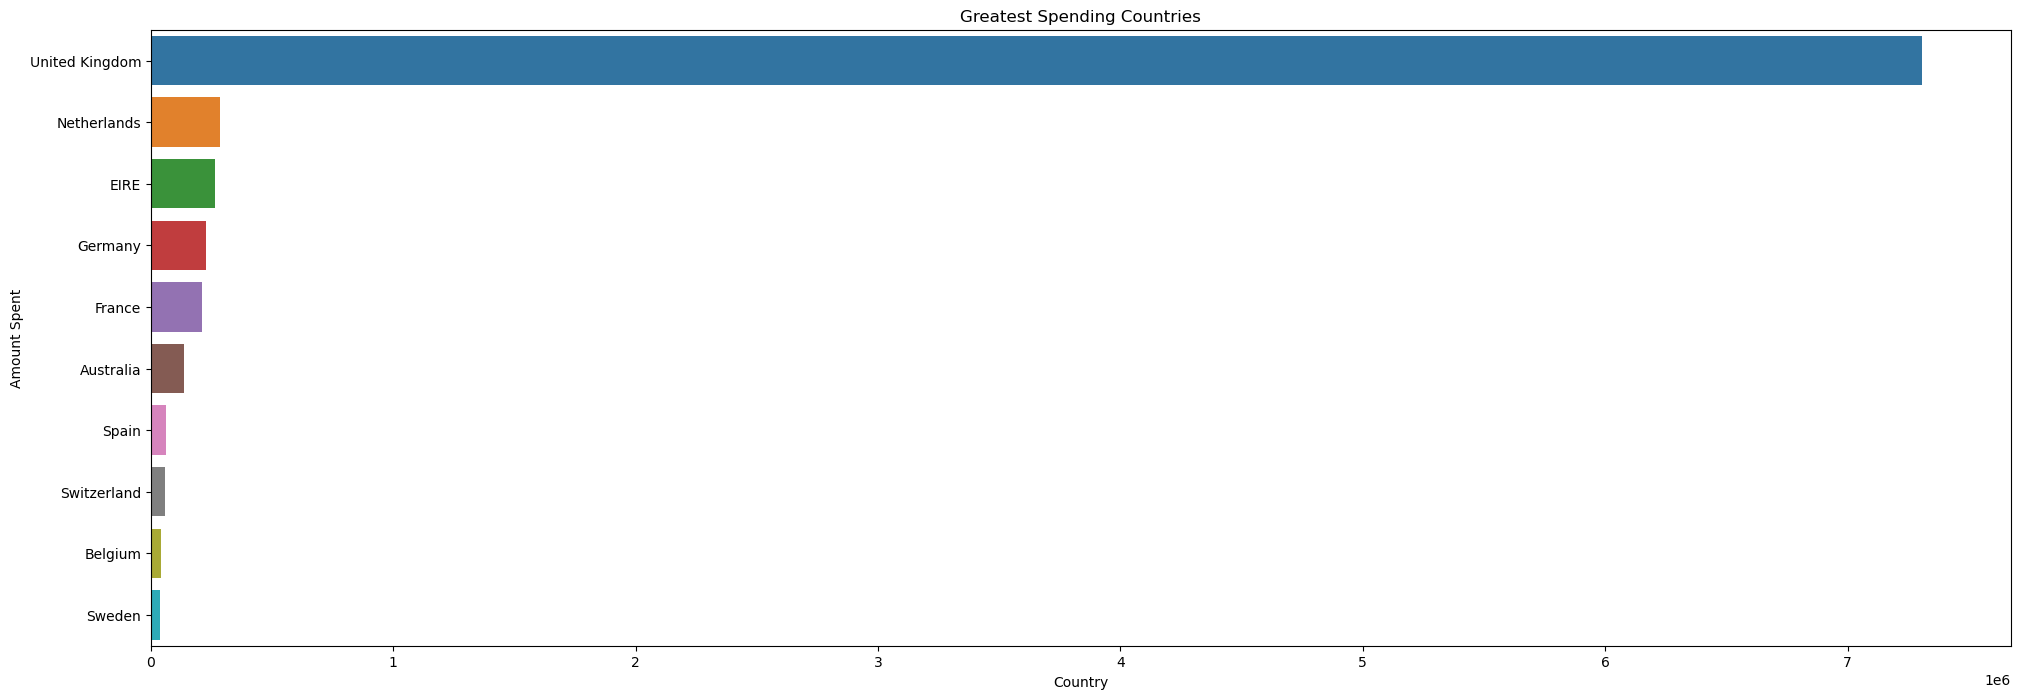

In [45]:
plt.figure(figsize=(24,8))
sns.barplot(x="amount_spent",y="country",data=country_spend)
plt.xlabel("Country")
plt.ylabel("Amount Spent")
plt.title("Greatest Spending Countries")
plt.show()